# *** Olympics Data Analysis ***

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("athlete_events.csv")
dt = pd.read_csv("noc_regions.csv")


In [288]:
#joining the datasets
df = ds.merge(dt,how="left",on='NOC')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [289]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [291]:
df.isnull().any()
# any() is used to check for any True (atleast one missing value) along columns if axis not defined


ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

#this shows that the 6 columns out of 17 has missing values

In [292]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [293]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Length: 271116, dtype: bool

In [294]:
# since columns names are not consistent in the newly formed dataframe so we will rename
df.rename(columns = {"region":"Region","notes":"Notes"},inplace = True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [295]:
nan_columns = df.isnull().any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

# here we just filtered out the columns having a null value with themselves

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [296]:
#function to extract particular country's olympics details
def country_details(team):
    mask = df["Team"] == team
    result = df[mask]
    return result

In [297]:
country_details("China")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270443,135272,Zou Wenzhi,M,NaN,NaN,NaN,China,CHN,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN,China,NaN
270444,135273,Zou Yuchen,M,20.0,203.0,107.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN,China,NaN
270445,135274,Zou Zhenxian,M,28.0,184.0,72.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Triple Jump,NaN,China,NaN
270559,135318,Zu Lijun,M,26.0,188.0,87.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 10 kilometres Open Water,NaN,China,NaN


In [298]:
#function to extract particular country's olympics details by another approach
def country_stats(team):
    return df.query('Team == @team')

In [299]:
country_stats("Denmark")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
1303,734,Otto Mnsted Acthon,M,30.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Equestrianism,"Equestrianism Men's Jumping, Individual",NaN,Denmark,NaN
1304,734,Otto Mnsted Acthon,M,30.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Equestrianism,"Equestrianism Men's Jumping, Team",NaN,Denmark,NaN
1305,734,Otto Mnsted Acthon,M,34.0,NaN,NaN,Denmark,DEN,1952 Summer,1952,Summer,Helsinki,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",NaN,Denmark,NaN
1306,734,Otto Mnsted Acthon,M,34.0,NaN,NaN,Denmark,DEN,1952 Summer,1952,Summer,Helsinki,Equestrianism,"Equestrianism Men's Three-Day Event, Team",NaN,Denmark,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270204,135176,Peter Hermann Zobel,M,24.0,174.0,69.0,Denmark,DEN,1960 Summer,1960,Summer,Roma,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",NaN,Denmark,NaN
270205,135176,Peter Hermann Zobel,M,24.0,174.0,69.0,Denmark,DEN,1960 Summer,1960,Summer,Roma,Equestrianism,"Equestrianism Men's Three-Day Event, Team",NaN,Denmark,NaN
270563,135322,Nathalie Xenia Margareta Benedikte zu Sayn-Wit...,F,33.0,176.0,85.0,Denmark,DEN,2008 Summer,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN,Denmark,NaN
270565,135322,Nathalie Xenia Margareta Benedikte zu Sayn-Wit...,F,37.0,176.0,85.0,Denmark,DEN,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN,Denmark,NaN


In [300]:
# to get the top countries performing showing countries having max participation over the years
top_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

#plot to show the top 10 countries trends in olympics


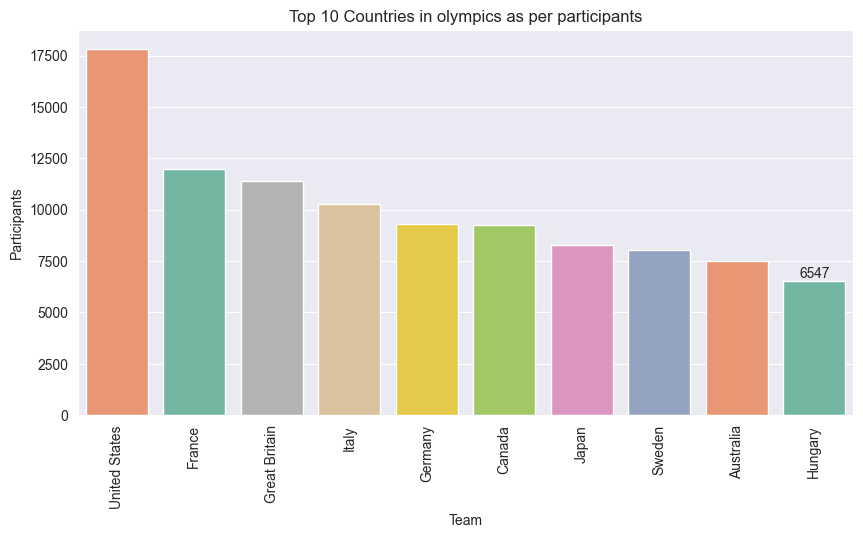

In [301]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = top_countries.index, y = top_countries.values, palette = 'Set2',hue = top_countries.values,legend = False)
plt.title("Top 10 Countries in olympics as per participants")
plt.xticks(rotation = 90)
plt.xlabel("Team")
plt.ylabel("Participants")
ax.bar_label(ax.containers[0])
plt.show()

#age distribution of participants

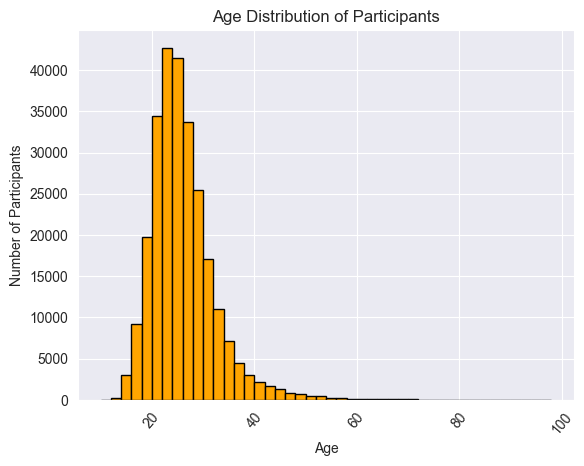

<Figure size 1200x600 with 0 Axes>

In [302]:
plt.hist(df.Age, bins = np.arange(10,100,2), edgecolor = "black",color = "orange")
plt.title("Age Histogram")
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.xticks(rotation = 50)
plt.figure(figsize = (12,6))
plt.show()


In [303]:
# sports played during winter
winter_sports = df[df.Season == "Winter"].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [304]:
#function to extract the seasonal sports(gives an array in result)
def season_sports(season):
    seasonal = df[df.Season == season].Sport.unique()
    return seasonal


In [305]:
season_sports("Summer")

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [306]:
#Male and Female Participants
gender_dist = df['Sex'].value_counts()
gender_dist

Sex
M    196594
F     74522
Name: count, dtype: int64

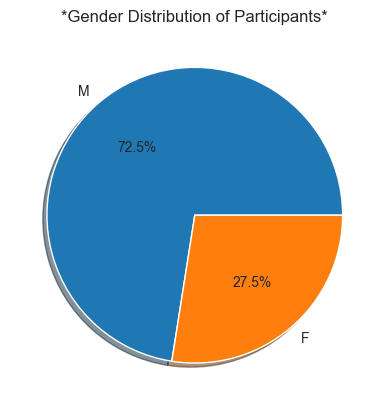

In [307]:
plt.pie(data=gender_dist,x=gender_dist.values, labels =gender_dist.index, autopct='%1.1f%%', shadow=True)
plt.title("*Gender Distribution of Participants*")
plt.show()

In [308]:
#Total Medals
df.Medal.value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [309]:
# For each team medal count
df.groupby("Team")["Medal"].value_counts().reset_index(name="Count")


,Team,Medal,Count
0,A North American Team,Bronze,4
1,Afghanistan,Bronze,2
2,Algeria,Bronze,8
3,Algeria,Gold,5
4,Algeria,Silver,4
...,...,...,...
778,Zambia,Silver,1
779,Zimbabwe,Gold,17
780,Zimbabwe,Silver,4
781,Zimbabwe,Bronze,1


In [310]:
#Total no. of female participants in each olympics
women_olympics = df[df["Sex"] == "F"].groupby("Year")["Sex"].count().reset_index(name = "Female Count")
women_olympics.tail()

#another approach
#df.query('Sex == "F"').groupby("Year")["Sex"].count().reset_index(name = "Female Count").tail()

,Year,Female Count
29,2008,5816
30,2010,1847
31,2012,5815
32,2014,2023
33,2016,6223


<Figure size 1000x700 with 0 Axes>

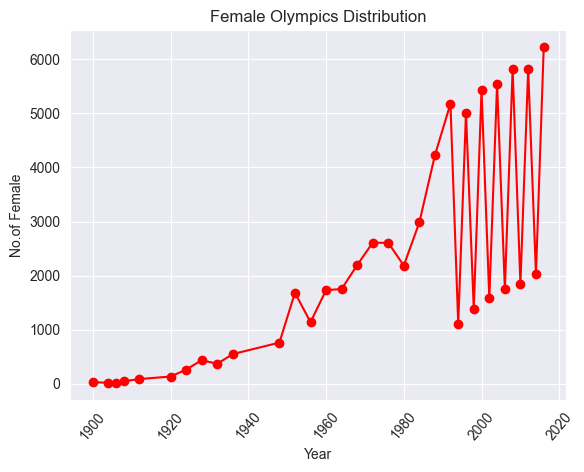

<Figure size 1000x700 with 0 Axes>

In [311]:
plt.plot(women_olympics["Year"], women_olympics["Female Count"], color="red", marker="o")
plt.title("Female Olympics Distribution")
plt.xticks(rotation = 50)
plt.xlabel("Year")
plt.ylabel("No.of Female")
plt.figure(figsize = (10,7),edgecolor = "black")

In [312]:
#Gold medal athletes
gold_medalist = df[df["Medal"] == "Gold"]
gold_medalist

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


In [313]:
#Gold medal athletes without NaN values included
gold_medalist = df[df["Medal"].notna() & (df["Medal"] == "Gold")]
gold_medalist

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


In [314]:
#gold medalists above 60
gold_medalist['ID'][gold_medalist['Age'] >= 60].count()

np.int64(10)

In [315]:
sporting_events = gold_medalist['Sport'][gold_medalist['Age'] >= 60]
sporting_events

104003    Art Competitions
105199               Roque
159298            Shooting
190952             Archery
226374             Archery
233386            Shooting
233387            Shooting
233390            Shooting
261102             Archery
261675    Art Competitions
Name: Sport, dtype: object

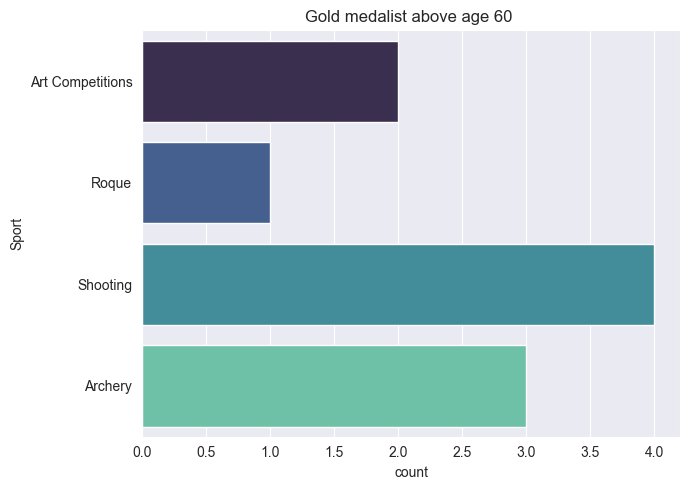

In [316]:
#plot for the sporting event
plt.figure(figsize = (7,5),edgecolor = "black")
sns.countplot(y=sporting_events,hue=sporting_events,legend=False, palette = "mako")
plt.title("Gold medalist above age 60 ")
plt.tight_layout()
plt.show()

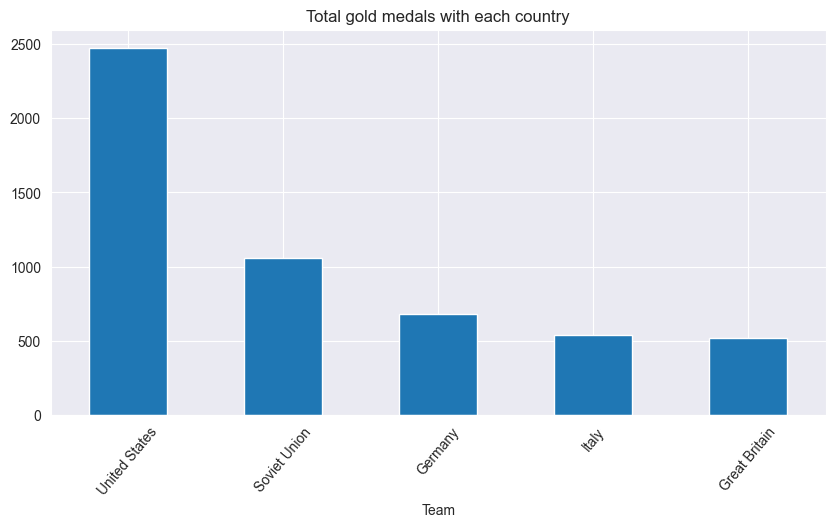

In [317]:
#Gold medals from each country
total_gold_medals = gold_medalist.Team.value_counts().head()
total_gold_medals.plot(kind = 'bar', figsize = (10,5))
plt.title("Total gold medals with each country")
plt.ylabel("")
plt.xticks(rotation = 50)
plt.show()

In [318]:
#latest Rio Olympics Data 2016
country_medals = gold_medalist.Team[df["Year"] == 2016].value_counts().head(10)
country_medals

Team
United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: count, dtype: int64

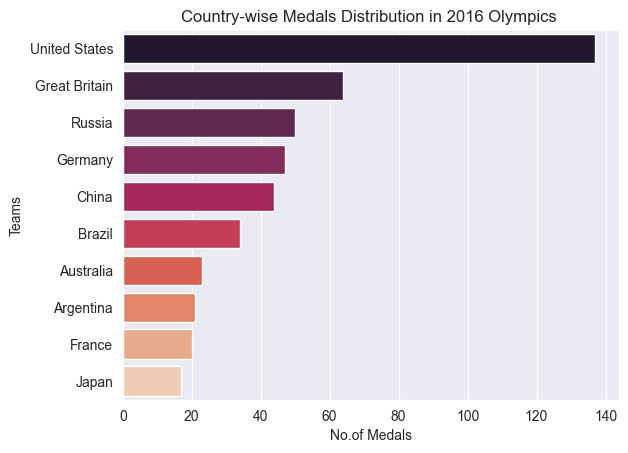

In [319]:
#plot for the above data
sns.barplot(x=country_medals , y = country_medals.index,hue=country_medals.index,legend=False ,palette = "rocket")
plt.title("Country-wise Medals Distribution in 2016 Olympics ")
plt.ylabel("Teams")
plt.xlabel("No.of Medals")
plt.show()

In [320]:
not_null_medals = df[(df['Height'].notnull()) & (df['Weight'].notnull())].head(10000)
print(not_null_medals)

         ID                                Name Sex   Age  Height  Weight  \
0         1                           A Dijiang   M  24.0   180.0    80.0   
1         2                            A Lamusi   M  23.0   170.0    60.0   
4         5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5         5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6         5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
...     ...                                 ...  ..   ...     ...     ...   
13012  7079  Robbert Franciscus "Robert" Bakker   M  25.0   196.0    92.0   
13014  7081            Steven Feico Alle Bakker   M  31.0   200.0   120.0   
13015  7081            Steven Feico Alle Bakker   M  39.0   200.0   120.0   
13021  7083         Mariya Valeryevna Baklakova   F  15.0   172.0    60.0   
13022  7084           Vera Vasilyevna Baklanova   F  17.0   160.0    57.0   

               Team  NOC        Games  Year  Season         City  \
0      

Text(0.5, 1.0, 'Height vs Weight distribution in Olympics ')

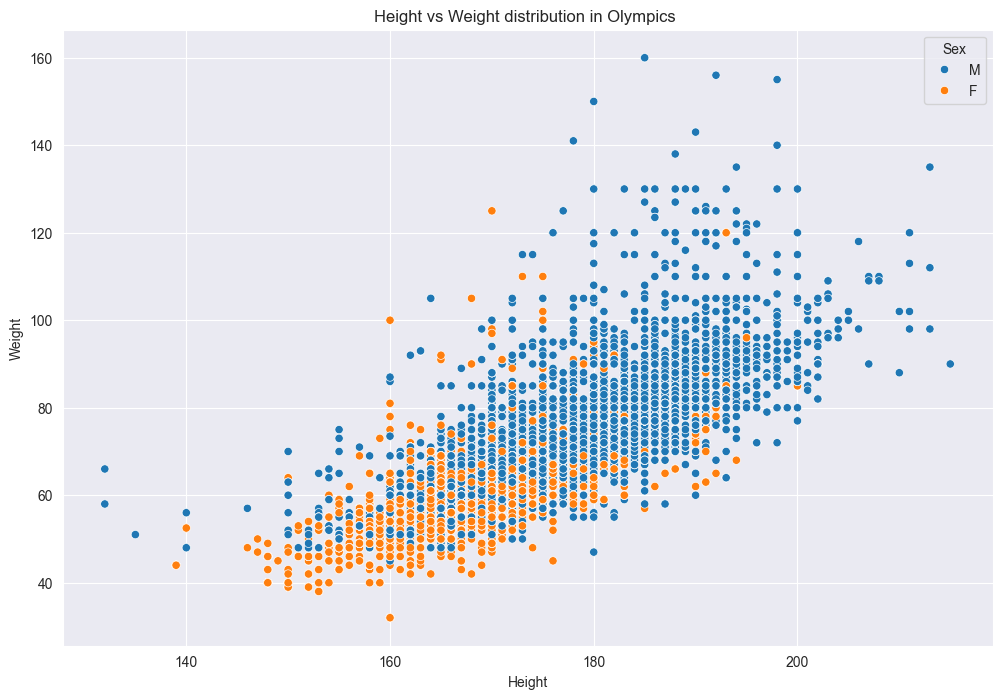

In [321]:
#Height vs Weight distribution in Olympic
plt.figure(figsize = (12,8),edgecolor = "black")
sns.scatterplot(x= 'Height',y = 'Weight',hue = 'Sex',data = not_null_medals)
plt.title("Height vs Weight distribution in Olympics ")